In [231]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [4]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар-индексов вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [44]:
# Упакуем нужный функционал получения списка пользователей с похожими пользователями в отдельную функцию. Она пригодится дважды
def get_like_users(rating):
    # Инициализируем словарь
    like_users = {}

    # В двух вложенных циклах выбираем последовательно ряд данных и сравниваем его со всеми остальными рядами
    for r1_id, row1 in enumerate(rating):
        best_row = 0
        best_row_dot = 0
        for r2_id, row2 in enumerate(rating):
            # Теперь вычислим косинус угла между этими векторами
            cur_row_dot = np.dot(row1, row2)/(np.linalg.norm(row1)*np.linalg.norm(row2))
            if r1_id != r2_id and cur_row_dot > best_row_dot:
                best_row_dot = cur_row_dot
                best_row = r2_id
        like_users[r1_id] = best_row
    return like_users

# Полученный словарь осталось только распечатать:        
print(get_like_users(raitings))


{0: 8, 1: 4, 2: 9, 3: 9, 4: 8, 5: 9, 6: 3, 7: 5, 8: 0, 9: 2}


<b> b) </b> В реальных задачах фильмов явно не 15, а сотни тысяч и даже миллионы. Также матрицы оценок очень разреженные, поэтому можно хранить сжатые представления для каждого пользователя. Попробуйте сжать признаковое пространство до размерности 5 любым известным вам методом и повторить пункт <b> a) </b>. Проверьте, для скольких пользователей изменился ближайший после такого сжатия.

In [50]:
# При использовании метода главных компонент может быть вычислена симметричная матрица ковариаций,
# на диагонали которой располагается дисперсия для каждого из столбцов. Если выбрать столбцы с максимальной дисперсией,
# мы тем самым отберем те колонки, для которых значения в строках отличаются наибольшим образом.
# Т.е. фактически нам надо сначала получить значения колонок, а потом посчитать дисперсию для каждой из них.

# Транспонируем матрицу рейтингов
ratings_t = raitings.transpose()
print(ratings_t)

# Вычисляем дисперсию для фильмов (в каждом ряду будут все оценки по конкретному фильму)
r_std = np.array([x.std() for x in ratings_t])
print(r_std)

# Получаем список индексов пяти фильмов, дисперсия по которым максимальная
r_std_sorted_5 = np.argsort(r_std)[-1:-6:-1]
print(r_std_sorted_5)

# Получаем список индексов десяти фильмов, дисперсия по которым максимальная 
r_std_sorted_10 = np.argsort(r_std)[-1:-11:-1]
print(r_std_sorted_10)

ratings_filtered_10 = raitings[:, r_std_sorted_10]
ratings_filtered_10

ratings_filtered_5 = raitings[:, r_std_sorted_5]
ratings_filtered_5

[[ 4  9  1  6  3  8  9  4  2  5]
 [ 4  2  6  1  7  3  8  1  7 10]
 [ 9  5  8  9  3  7  4  6  7  8]
 [ 4 10  8  7  5  3  8  4  6  8]
 [ 1  7  4  7  7  8  8  3 10  9]
 [ 6  8  9  9  9  6 10 10  6  7]
 [10 10  3  2  9  1  6  4  8  2]
 [ 7  5  8  3  6  8  1  4  9  9]
 [ 9  6 10  5  2  8  1  2  8  9]
 [ 6  2  5  1  9  6  2  8  6 10]
 [ 9  1  2  6  1  1  9  7 10  8]
 [ 2  6  6  6  2  9  5  9  1  8]
 [ 8  8  8  3  8  4  2  3  7  8]
 [ 6  9  1  2 10 10  7  8 10  6]
 [ 6  7  6  7  6  1  2  3  4 10]]
[2.7        2.9816103  1.95959179 2.14709106 2.69072481 1.54919334
 3.35410197 2.56904652 3.16227766 2.90688837 3.55527777 2.76405499
 2.42693222 3.08058436 2.56124969]
[10  6  8 13  1]
[10  6  8 13  1  9 11  0  4  7]


array([[ 9, 10,  9,  6,  4],
       [ 1, 10,  6,  9,  2],
       [ 2,  3, 10,  1,  6],
       [ 6,  2,  5,  2,  1],
       [ 1,  9,  2, 10,  7],
       [ 1,  1,  8, 10,  3],
       [ 9,  6,  1,  7,  8],
       [ 7,  4,  2,  8,  1],
       [10,  8,  8, 10,  7],
       [ 8,  2,  9,  6, 10]])

In [53]:
# Полный список (15 фильмов):        
print(get_like_users(raitings))

# Список (10 фильмов):        
print(get_like_users(ratings_filtered_10))

# Список (5 фильмов)        
print(get_like_users(ratings_filtered_5))

# Итого видим, что сокращение списка с 15 до 10 фильмов позволяет получить оценку, на 70 процентов совпадающую с исходной
# но при уменьшении списка с 15 до 5 фильмов точность оценки падает существенно (4 совпадения из 10, т.е. 40 процентов)

{0: 8, 1: 4, 2: 9, 3: 9, 4: 8, 5: 9, 6: 3, 7: 5, 8: 0, 9: 2}
{0: 8, 1: 5, 2: 9, 3: 6, 4: 8, 5: 9, 6: 3, 7: 9, 8: 0, 9: 2}
{0: 8, 1: 4, 2: 9, 3: 0, 4: 1, 5: 8, 6: 8, 7: 8, 8: 0, 9: 8}


## Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать). Рекомендуется использовать библиотеку sympy для проверки формулы производной, полученной на бумаге. Вычисление производной в точке можно выполнить с помощью sympy или с помощью <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html">scipy.misc.derivative</a>.


In [64]:
# Для манипуляций с функциями и их производными
import sympy as sym

x = sym.Symbol('x')

expr_ = sym.tan(sym.sin(x) + sym.cos(2*x + 3))**2
print(f'Функция: {expr_}')

diff_ = sym.diff(expr_, x)
print(f'Производная: {diff_}')

# Выводим результаты
print(f'В точке х=1 значение первой производной = {diff_.subs(x,1).evalf()}')

Функция: tan(sin(x) + cos(2*x + 3))**2
Производная: 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
В точке х=1 значение первой производной = 55.3859176353379


## Задание 3

Часто в реальных задачах случается ситуация, когда необходимо понять, какое распределение и с какими параметрами лучшим образом описывает данные. Ведь поняв, что некоторая метрика хорошо описывается, например, нормальным распределением с параметрами 3 и 8.5 мы можем для быстрых визуализаций и экспериментов хранить всего 2 числа - параметра распределения и название самого распределения вместо гигабайтов самих данных. В этом задании мы решим такую задачу 3-мя разными способами: первые 2 более общие для "подгонки" любых функций и 3-ий для распределений.

In [225]:
x = np.linspace(-30, 30, 300)
y = [11.642,  9.467,  8.227, 10.372,  8.768,  9.544,  8.202, 10.106,
       10.664, 11.03 , 12.673, 10.445, 12.096, 15.562, 10.55 , 10.81 ,
        8.833, 12.087, 10.463,  9.149,  8.633, 12.233, 10.815, 11.346,
        4.863, 11.602,  9.997, 10.578,  9.097,  8.414, 11.852, 14.262,
        8.527,  5.725,  6.567, 10.767,  4.84 ,  3.433, 11.152, 10.613,
       13.44 ,  7.327,  9.3  , 11.303, 10.732, 10.334, 16.763,  8.541,
       16.307, 10.787, 10.362,  8.362, 11.78 , 13.002,  8.413,  9.334,
       11.631, 11.935,  7.433, 13.87 ,  8.825, 11.377,  6.38 , 11.774,
       13.307,  8.946, 10.171, 11.951,  7.612, 12.916,  6.851,  6.713,
        8.817,  9.485,  9.07 , 10.886, 11.193, 11.707, 10.121, 13.486,
       13.641,  7.749,  6.928, 12.619,  9.498, 10.032,  8.561, 12.907,
       18.546, 10.533, 10.127,  8.875,  9.462, 10.296, 15.635,  9.33 ,
        5.883,  6.671, 11.746, 13.132,  5.702, 12.136,  8.054, 10.632,
       12.995, 10.931, 12.841,  9.757,  9.558, 11.962,  9.997,  8.256,
       14.05 , 11.056,  4.397, 15.013, 10.908,  5.036, 14.101, 11.065,
        6.535,  9.017,  9.327,  8.357, 12.342, 10.808, 10.387,  8.018,
        7.879,  7.686,  5.364, 10.494,  5.518, 13.415,  7.873,  9.122,
       11.167,  7.197, 15.408, 10.881, 11.821, 10.617, 11.34 , 13.319,
       11.407,  7.642, 10.962, 11.6  , 11.243,  6.225, 12.527,  7.485,
        6.367,  5.218,  8.957, 11.71 , 13.981, 11.627, 11.292, 11.07 ,
        7.632, 11.931, 11.732, 10.35 , 14.874, 10.067,  6.804, 12.953,
        9.68 , 10.531,  7.245,  6.795, 14.585,  7.385, 17.949, 13.315,
       11.558,  9.921,  9.27 , 13.003, 11.817,  7.785, 12.956, 11.09 ,
       15.251, 13.163, 10.076, 12.429,  5.511,  8.672,  2.814,  8.762,
       12.139, 10.646, 11.607,  6.45 ,  3.825, 10.043, 10.562,  8.066,
       11.735,  5.764,  8.254, 10.533, 13.903, 12.375, 11.112, 15.186,
       11.619, 12.749,  8.023,  8.477, 10.303,  6.821, 13.099,  7.954,
       10.672,  7.655,  3.747, 14.4  , 10.428,  6.976,  8.336, 13.423,
        7.458, 13.031, 11.287,  9.101, 10.941, 17.224, 10.406, 10.363,
       16.617, 11.836, 12.659, 12.633, 14.962,  6.785,  5.254,  4.079,
       12.576, 12.682, 12.992, 10.544, 11.365,  7.373, 14.686,  7.201,
       14.893, 12.19 ,  9.647,  9.463, 11.616,  7.891,  8.553,  8.555,
        5.347, 11.246, 15.385,  8.883, 11.999, 10.675,  8.107, 12.795,
       13.337,  9.084, 11.664, 11.509,  8.589, 14.145, 10.385, 16.605,
        6.097,  6.718, 11.883,  5.8  ,  8.964,  8.118, 10.759, 13.492,
        9.573, 12.696, 10.075, 11.065, 14.588,  6.215, 13.786,  7.367,
       12.094, 10.403, 10.923, 13.554, 11.057,  8.593, 16.848,  7.137,
        8.549,  8.899, 11.641, 12.491]

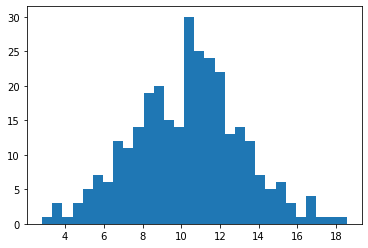

In [7]:
plt.hist(y, bins=30)
plt.show()

В библиотеке <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats</a> есть список непрерывных распределений и у каждого из них есть метод fit(data), позволяющий найти наилучшие параметры распределения по данным. Вам необходимо выбрать подходящее, на ваш взгляд, распределение и найти к нему оптимальные параметры с помощью метода fit(x).

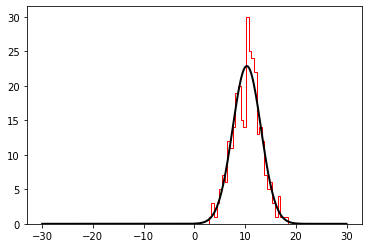

In [282]:
norm_fit_res = norm.fit(y)
norm_fit_res

fig, ax = plt.subplots(1, 1)

scaled_norm = [z*160 for z in norm.pdf(x, norm_fit_res[0], norm_fit_res[1])]
ax.plot(x, scaled_norm, 'k-', lw=2, label='frozen pdf')

plt.hist(y, bins=30, color='red', histtype='step')

plt.show()


# Наверное это не вполне то решение, которое ожидалось - в результате подбора параметров
# получились матожидание 10.3438 и среднеквадратичное отклонение 2.79 в случае использования нормального распределения.
# Я хотел дополнительно объединить график гистограммы и кривой нормального распределения с полученными параметрами,
# но к своему стыду не нашел правильного кода для того, чтобы это сделать.
# Буду благодарен за рекомендации.

# UPD
# Спасибо за рекомендации. Я уже на этой странице, до того, как сдался, сидел часа два.
# Но вот сейчас в голову пришел один из вариантов, как это можно сделать, все-таки наложив на гистограмму кривую.
# Коэффициент 160 в конструкции, инициализирующей выше переменную scaled_norm, подобран приблизительно. 


## Задание 4

Наверняка вы когда-то слышали про такое понятие, как A/B тесты, а если нет, вот неплохая вводная <a href="https://habr.com/ru/post/233911/"> статья </a> по ним. В этом задании мы поймём, как пройденное понятие Центральной предельной теоремы связано с таким важным прикладным инструментом, как A/B тестирование. 

Пусть для одной группы пользователей мы показываем 1-ый тип дизайна сайта, а для другой группы 2-ой. Траты пользователей первой группы генерируются случайной величиной rv1, траты пользователей второй группы - rv2. Поэкспериментируйте с количеством пользователей, размерами выборок (как в ЦПТ) и постройте гистограммы средних. Проанализируйте, когда визуально разница становится заметной. Этот механизм применяется в реальных задачах, но решение о разнице происходит по результатам статистических тестов (они не входили в программу нашего курса, но очень рекомендую о них прочитать).

101.01353183510597
101.79722391879989


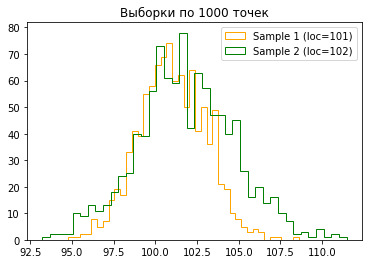

In [207]:
# До модуля Math у нас был модуль Статистика в Python, поэтому можно провести и статистические тесты. Не проблема.

rv1 = norm(loc=101, scale=2)
rv2 = norm(loc=102, scale=3)

# Генерируем выборки по 1000 значений в каждой
sample1_1000 = rv1.rvs(size=1000)
sample2_1000 = rv2.rvs(size=1000)

# Выведем средние значения полученных выборок
print(sample1_1000.mean())
print(sample2_1000.mean())

# Распечатаем гистограммы
plt.title('Выборки по 1000 точек')
plt.hist(sample1_1000, label='Sample 1 (loc=101)', bins=40, color='orange', histtype='step')
plt.hist(sample2_1000, label='Sample 2 (loc=102)', bins=40, color='green', histtype='step')
plt.legend()

# Визуально смещение второй выборки вправо заметно 

In [205]:
# Проверим с помощью критерия Стьюдента, насколько эти две выборки отличаются.
# Нулевая гипотеза - выборки идентичны, альтернативная гипотеза - они отличаются.
import scipy.stats as stats 
res_1000 = stats.ttest_ind(sample1_1000, sample2_1000)
print(res_1000)
# Видим, что вычисленное pvalue близко к нулю, т.е. нулевая гипотеза смело отвергается. Выборки однозначно отличаются.

Ttest_indResult(statistic=-8.92392618693464, pvalue=9.940997586629524e-19)


100.99941439639369
101.78225618834269


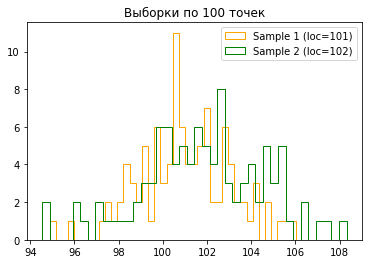

In [213]:
# Теперь сгенерируем выборки по 100 значений
sample1_100 = rv1.rvs(size=100)
sample2_100 = rv2.rvs(size=100)

# Выведем средние значения полученных выборок
print(sample1_100.mean())
print(sample2_100.mean())

plt.title('Выборки по 100 точек')
plt.hist(sample1_100, label='Sample 1 (loc=101)', bins=40, color='orange', histtype='step')
plt.hist(sample2_100, label='Sample 2 (loc=102)', bins=40, color='green', histtype='step')
plt.legend()

In [214]:
res_100 = stats.ttest_ind(sample1_100, sample2_100)
print(res_100.pvalue)

# Даже при выборках на сто точек p_value меньше 0.05, а значит нулевую гипотезу о равенстве выборок можно отбросить
# и считать, что выборки отличаются
# p.s. На самом деле повторные запуски иногда приводят к тому, что p_value превышает 0.05, т.е. все-таки 100 точек маловато.

0.024810495609264852


99.56394139728873
101.72150214915857


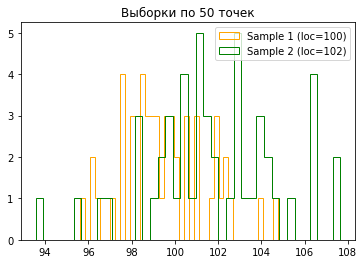

In [220]:
# Еще один эксперимент проведем, еще более уменьшив размер выборки (до 50), но увеличив дельту между loc двух выборок.
rv1 = norm(loc=100, scale=2)
rv2 = norm(loc=102, scale=3)

# Генерируем выборки по 1000 значений в каждой
sample1_50 = rv1.rvs(size=50)
sample2_50 = rv2.rvs(size=50)

# Выведем средние значения полученных выборок
print(sample1_50.mean())
print(sample2_50.mean())

# Распечатаем гистограммы
plt.title('Выборки по 50 точек')
plt.hist(sample1_50, label='Sample 1 (loc=100)', bins=40, color='orange', histtype='step')
plt.hist(sample2_50, label='Sample 2 (loc=102)', bins=40, color='green', histtype='step')
plt.legend()



In [224]:
res_50 = stats.ttest_ind(sample1_50, sample2_50)
print(res_50)

# Такая дельта для loc (примерно в 3 процента) уже является настолько значимой, что даже при относительно маленьких выборках
# разница ловится.
# Визуально это тоже заметно, в том числе при последовательном запуске кода из предыдущего блока несколько раз.

Ttest_indResult(statistic=-4.20165831472012, pvalue=5.849512088045338e-05)


## Задание 5

Вычислите собственные значения и собственные вектора матрицы с помощью функции python и по алгоритму (на бумаге или в latex прямо в ноутбуке):

In [67]:
A = [[-1, -6], 
     [2, 6]]

In [71]:
np.linalg.eig(A)

(array([2., 3.]),
 array([[-0.89442719,  0.83205029],
        [ 0.4472136 , -0.5547002 ]]))

Найдите обратную матрицу для матрицы A и посчитайте собственные значения для неё, проанализируйте взаимосвязь первой пары и второй пары собственных значений.

In [183]:
A2 = np.linalg.inv(A)
A2
np.linalg.eig(A2)

(array([0.5       , 0.33333333]),
 array([[ 0.89442719, -0.83205029],
        [-0.4472136 ,  0.5547002 ]]))

In [ ]:
# Таки да, видно, что собственные векторы матрицы и ее обратной матрицы обратнонаправленны, а собственные числа
# при перемножении дают единицы.

## Задание 6

Представим, что мы живём в параллельной вселенной, где существуют монетки с тремя гранями.
При подбрасывании монетки выпадение 1-ой грани происходит с вероятностью 0.2, 2-ой грани - 0.5, 3-ей грани - 0.3.
Какова вероятность при 4-х подбрасываниях увидеть все 3 грани (подбрасывания осуществляются независимо друг от друга)?

Решение для данного задания можно посчитать явно, но также можно запустить процесс симуляции, который с довольно небольшой погрешностью даст правильный ответ.

In [76]:
# Вначале попытаемся подключить голову и решить задачку аналитически.
# Можно подсчитать вероятности того, что каждое из возможных событий за четыре цикла не произойдет ни разу:
p_1 = 0.2
p_2 = 0.5
p_3 = 0.3
p_no = 1 - (p_1 + p_2)**4 - (p_2 + p_3)**4 - (p_3 + p_1)**4
print(p_no)
# При этом нам надо компенсировать дважды подсчитанную вероятность того, что каждое из событий произойдет 4 раза подряд
p_final = p_no + p_1**4 + p_2**4 + p_3**4
print(f'Вычисленная вероятность равна {p_final}')

0.28779999999999994
Вычисленная вероятность равна 0.35999999999999993


In [181]:
# Теперь попробуем провести эксперименты по вычислению вероятности на основании большого количества экспериментов.
# Будем генерировать четыре целых числа от 1 до 10 и будем считать, что если число 1 или 2, то это - 1-я грань, 
# если 3 - 7, то вторая и если 8 - 10, то третья.
# С количеством запусков можно "поиграться", но начнем с 1000

cnt = 0
cycles = 10000
for i in range(1, cycles+1):
    events = []
    for event in np.random.randint(1,11,4):
        if event in [1, 2]:
            events.append(1)
        elif event in [3, 4, 5, 6, 7]:
            events.append(2)
        else:
            events.append(3)
    if 1 in events and 2 in events and 3 in events:
        cnt += 1

print(f'"Экспериментальная" вероятность равна {cnt/cycles}')        

"Экспериментальная" вероятность равна 0.3603
